In [1]:
pip install tensorflow pandas numpy matplotlib scikit-learn


   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.8/385.2 MB 2.1 MB/s eta 0:03:04
   ---------------------------------------- 1.3/385.2 MB 2.3 MB/s eta 0:02:46
   ---------------------------------------- 1.8/385.2 MB 2.3 MB/s eta 0:02:44
   ---------------------------------------- 2.4/385.2 MB 2.2 MB/s eta 0:02:52
   ---------------------------------------- 2.6/385.2 MB 2.2 MB/s eta 0:02:53
   ---------------------------------------- 3.1/385.2 MB 2.2 MB/s eta 0:02:54
   ---------------------------------------- 3.7/385.2 MB 2.2 MB/s eta 0:02:52
   ---------------------------------------- 4.2/385.2 MB 2.2 MB/s eta 0:02:53
   ---------------------------------------- 4.7/385.2 MB 2.2 MB/s eta 0:02:51
    --------------------------------------- 5.0/385.2 MB 2.2 MB/s eta 0:02:54
    --------------------------------------- 5.5/385.2 MB 2.2 MB/s eta 0:02:55


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import LabelEncoder

In [1]:
pip show tensorflow


Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\Users\THARUKA\anaconda3\envs\Research_Project_env\Lib\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load the data from the CSV file
data_transient_nd  = pd.read_csv('LO_NL_Transient_P2.csv')
data_nd = pd.read_csv('LO_NL_ND_P2.csv')
data_gasket_transient = pd.read_csv('LO_GL_Transient_P2.csv')
data_gasket_nd = pd.read_csv('LO_GL_ND_P2.csv')
data_crack_transient = pd.read_csv('LO_CC_Transient_P2.csv')
data_crack_nd = pd.read_csv('LO_CC_ND_P2.csv')
# Label the datasets
data_transient_nd['Category'] = 'No Leak - Transient'
data_nd['Category'] = 'No Leak - ND'
data_gasket_transient['Category'] = 'Gasket Leak - Transient'
data_gasket_nd['Category'] = 'Gasket Leak - ND'
data_crack_transient['Category'] = 'Circumferential Crack - Transient'
data_crack_nd['Category'] = 'Circumferential Crack - ND'



# Combine all datasets
combined_data = pd.concat([data_transient_nd, data_nd, data_gasket_transient, data_gasket_nd, data_crack_transient, data_crack_nd])

# Encode the 'Category' column to numerical labels
label_encoder = LabelEncoder()
combined_data['Category'] = label_encoder.fit_transform(combined_data['Category'])

# Separate features and labels
X = combined_data[['Sample', 'Value']].values  # Features: Sample and Value
y = combined_data['Category'].values 


In [4]:
num_rows = combined_data.shape[0]
print(f"Number of rows: {num_rows}")

Number of rows: 5495686


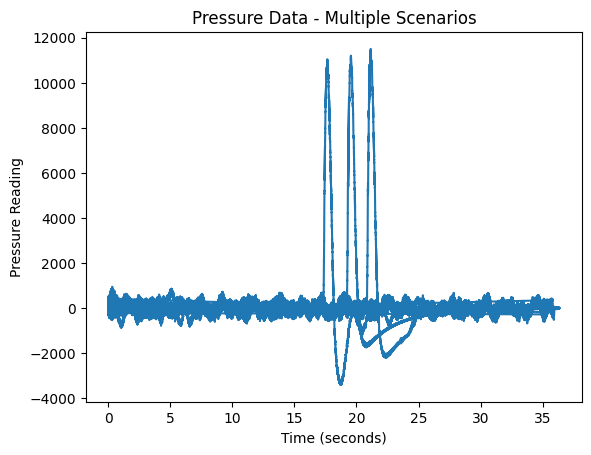

In [3]:
# Visualization (Optional)
plt.plot(combined_data['Sample'], combined_data['Value'])
plt.title('Pressure Data - Multiple Scenarios')
plt.xlabel('Time (seconds)')
plt.ylabel('Pressure Reading')
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from tensorflow.keras.layers import GlobalMaxPooling1D

# Define the LSTM model for multiclass classification with added layers
model = Sequential()
model.add(LSTM(64, input_shape=(window_size, 1), return_sequences=True))
model.add(LSTM(32, return_sequences=True))  # Additional LSTM layer with return_sequences=True
model.add(LSTM(16, activation='sigmoid', return_sequences=True))  # LSTM with sigmoid activation
model.add(GlobalMaxPooling1D())  # Global max pooling layer
model.add(Dense(16, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Multiclass classification

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary to confirm the new architecture
model.summary()


c:\Users\THARUKA\anaconda3\envs\Research_Project_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50, 16)         │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 16)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,822 (128.21 KB)

 Trainable params: 32,822 (128.21 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [9]:
history = model.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/8
137393/137393 ━━━━━━━━━━━━━━━━━━━━ 382s 3ms/step - accuracy: 0.4488 - loss: 1.3008 - val_accuracy: 0.5254 - val_loss: 1.1375
Epoch 2/8
137393/137393 ━━━━━━━━━━━━━━━━━━━━ 361s 3ms/step - accuracy: 0.5283 - loss: 1.1331 - val_accuracy: 0.5413 - val_loss: 1.0993
Epoch 3/8
137393/137393 ━━━━━━━━━━━━━━━━━━━━ 380s 3ms/step - accuracy: 0.5504 - loss: 1.0875 - val_accuracy: 0.5584 - val_loss: 1.0708
Epoch 4/8
137393/137393 ━━━━━━━━━━━━━━━━━━━━ 397s 3ms/step - accuracy: 0.5642 - loss: 1.0584 - val_accuracy: 0.5781 - val_loss: 1.0304
Epoch 5/8
137393/137393 ━━━━━━━━━━━━━━━━━━━━ 417s 3ms/step - accuracy: 0.5726 - loss: 1.0387 - val_accuracy: 0.5762 - val_loss: 1.0235
Epoch 6/8
137393/137393 ━━━━━━━━━━━━━━━━━━━━ 433s 3ms/step - accuracy: 0.5789 - loss: 1.0252 - val_accuracy: 0.5831 - val_loss: 1.0151
Epoch 7/8
137393/137393 ━━━━━━━━━━━━━━━━━━━━ 383s 3ms/step - accuracy: 0.5828 - loss: 1.0150 - val_accuracy: 0.5898 - val_loss: 0.9948
Epoch 8/8
137393/137393 ━━━━━━━━━━━━━━━━━━━━ 375s 3ms/s

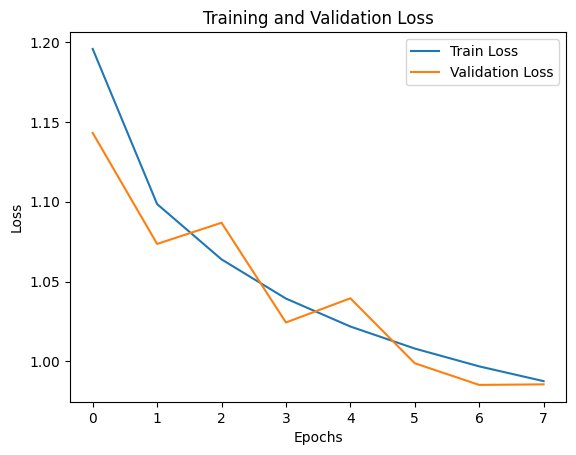

In [18]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [16]:
predictions = model.predict(X_test)


11489/11489 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


In [10]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


34349/34349 ━━━━━━━━━━━━━━━━━━━━ 49s 1ms/step - accuracy: 0.5884 - loss: 1.0017
Test Accuracy: 58.91%


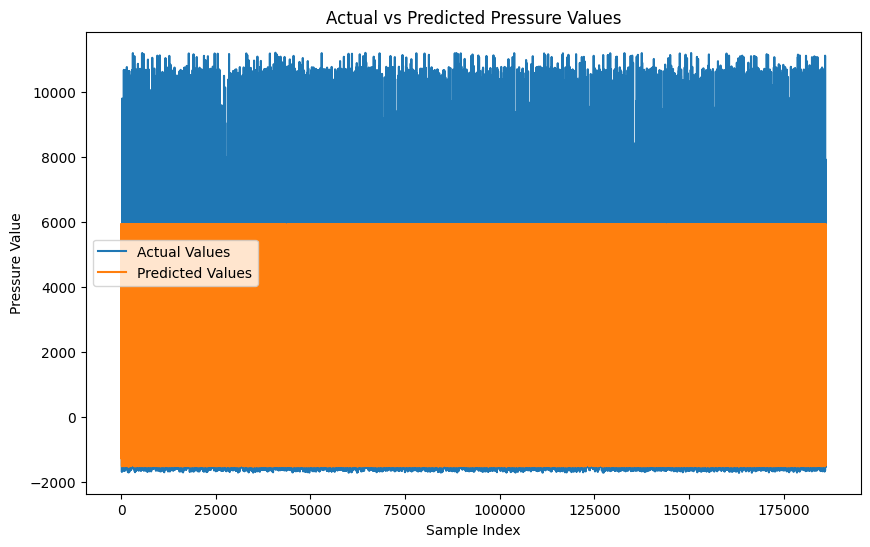

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Actual vs Predicted Pressure Values')
plt.xlabel('Sample Index')
plt.ylabel('Pressure Value')
plt.legend()
plt.show()
